# EASY LEVEL Exercise 1

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("data/student_scores.csv")
# TODO: Display first 10 rows
print(df.head(10))

   student_id  exam_score
0           1        81.0
1           2        73.3
2           3        82.8
3           4        93.3
4           5        72.2
5           6        72.2
6           7        94.0
7           8        84.2
8           9        69.4
9          10        81.5


In [3]:
# TODO: Check shape and missing values
print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

Dataset shape: (200, 2)
Missing values:
student_id    0
exam_score    0
dtype: int64


In [4]:
# TODO: Calculate basic statistics
mean_score = df['exam_score'].mean()
median_score = df['exam_score'].median()
std_score = df['exam_score'].std()
min_score = df['exam_score'].min()
max_score = df['exam_score'].max()

print(f"\n=== EXAM SCORE STATISTICS ===")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Std Dev: {std_score:.2f}")
print(f"Range: {min_score:.2f} - {max_score:.2f}")


=== EXAM SCORE STATISTICS ===
Mean: 74.45
Median: 74.95
Std Dev: 11.00
Range: 43.60 - 100.00


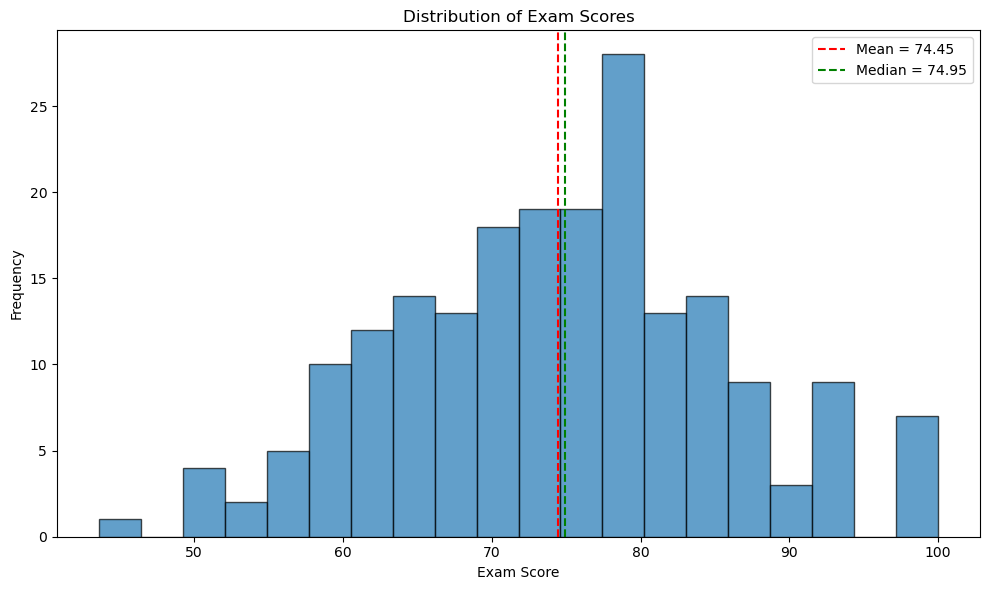

In [5]:
# TODO: Create histogram with reference lines
plt.figure(figsize=(10, 6))
plt.hist(df['exam_score'], bins=20, edgecolor="black", alpha=0.7)

plt.axvline(mean_score, color="red", linestyle="--", label=f"Mean = {mean_score:.2f}")
plt.axvline(median_score, color="green", linestyle="--", label=f"Median = {median_score:.2f}")

plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# TODO: Answer interpretation questions
print("\n=== INTERPRETATION ===")
print("1. Distribution shape: normally distributed")
print("2. Mean vs Median: almost the same")
print("3. Score clustering: around 70-80")
print("4. Exam difficulty assessment: the exam seems hard because the average score was 74")



=== INTERPRETATION ===
1. Distribution shape: normally distributed
2. Mean vs Median: almost the same
3. Score clustering: around 70-80
4. Exam difficulty assessment: the exam seems hard because the average score was 74


# EASY LEVEL EXERCISE 2

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("data/employee_salaries.csv")

# Explore the data
print("First 10 rows:")
print(df.head(10))

print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

First 10 rows:
   employee_id   department     salary  years_experience
0            1  Engineering   97155.75               5.6
1            2  Engineering  101215.69               7.0
2            3  Engineering  111661.02               7.8
3            4  Engineering  111076.04               7.8
4            5  Engineering   62446.61               0.5
5            6  Engineering   71243.50               3.4
6            7  Engineering  100300.71               0.3
7            8  Engineering  100275.72               4.0
8            9  Engineering  100300.95               2.9
9           10  Engineering  167054.63              10.9

Dataset shape: (500, 4)

Data types:
employee_id           int64
department           object
salary              float64
years_experience    float64
dtype: object

Missing values:
employee_id         0
department          0
salary              0
years_experience    0
dtype: int64


In [8]:
print("\n=== EMPLOYEES PER DEPARTMENT ===")
department_counts = df['department'].value_counts()
print(department_counts)


=== EMPLOYEES PER DEPARTMENT ===
department
Engineering    125
Sales          125
Marketing      125
HR             125
Name: count, dtype: int64


In [9]:
# Check for duplicate employee IDs
duplicate_count = df.duplicated(subset=['employee_id']).sum()
print(f"\nDuplicate employee IDs: {duplicate_count}")

# Show unique departments
print(f"\nDepartments: {df['department'].unique()}")

# Salary statistics by department
print("\n=== SALARY STATISTICS BY DEPARTMENT ===")
department_stats = df.groupby('department')['salary'].describe()
print(department_stats)


Duplicate employee IDs: 0

Departments: ['Engineering' 'Sales' 'Marketing' 'HR']

=== SALARY STATISTICS BY DEPARTMENT ===
             count         mean           std      min       25%       50%  \
department                                                                   
Engineering  125.0  92191.89160  20219.216636  40000.0  77995.66  92270.35   
HR           125.0  65531.44320  10683.593313  40000.0  58690.34  66533.63   
Marketing    125.0  67973.25712  14785.933155  40000.0  58325.43  67240.25   
Sales        125.0  74820.57704  17734.962344  40000.0  63722.56  73164.91   

                   75%        max  
department                         
Engineering  104945.87  167054.63  
HR            72783.64   96588.58  
Marketing     77764.89  108600.40  
Sales         88452.62  117737.93  


/var/folders/ct/plpzgdvn55z8j5m2qn9j63mm0000gn/T/ipykernel_13995/887234740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department',


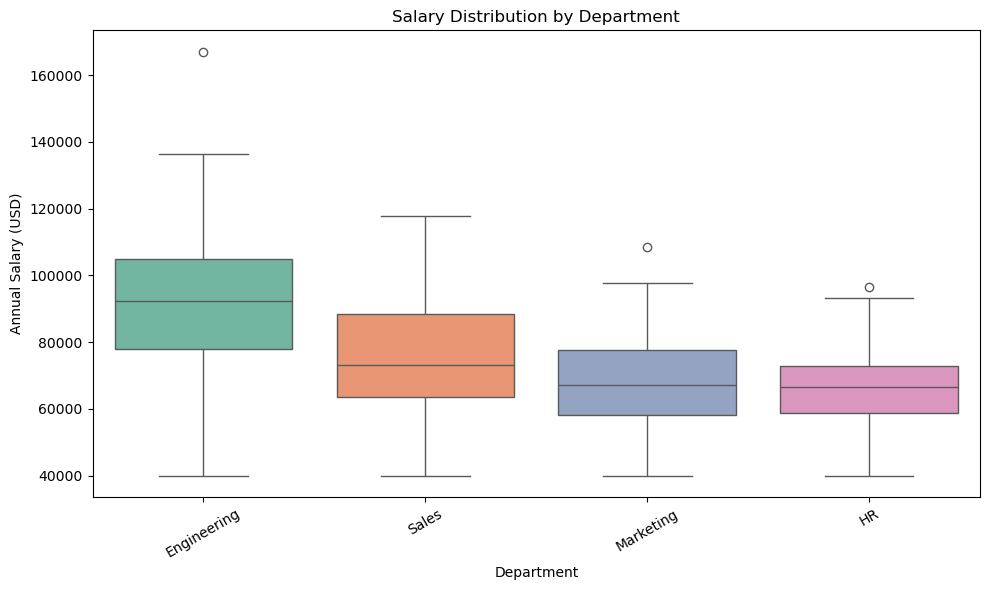

In [10]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='department',
            y='salary',
            data=df,
            palette='Set2')

plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Annual Salary (USD)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [11]:
print("\n=== OUTLIER ANALYSIS ===")

for dept in df['department'].unique():
    dept_data = df[df['department'] == dept]['salary']
    
    Q1 = dept_data.quantile(0.25)
    Q3 = dept_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dept_data[(dept_data < lower_bound) | 
                         (dept_data > upper_bound)]
    
    print(f"\n{dept}:")
    print(f"  Median salary: ${dept_data.median():,.2f}")
    print(f"  Salary range: ${dept_data.min():,.2f} - ${dept_data.max():,.2f}")
    print(f"  IQR: ${IQR:,.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers.values}")


=== OUTLIER ANALYSIS ===

Engineering:
  Median salary: $92,270.35
  Salary range: $40,000.00 - $167,054.63
  IQR: $26,950.21
  Number of outliers: 1
  Outlier values: [167054.63]

Sales:
  Median salary: $73,164.91
  Salary range: $40,000.00 - $117,737.93
  IQR: $24,730.06
  Number of outliers: 0

Marketing:
  Median salary: $67,240.25
  Salary range: $40,000.00 - $108,600.40
  IQR: $19,439.46
  Number of outliers: 1
  Outlier values: [108600.4]

HR:
  Median salary: $66,533.63
  Salary range: $40,000.00 - $96,588.58
  IQR: $14,093.30
  Number of outliers: 1
  Outlier values: [96588.58]


In [12]:
print("\n=== INTERPRETATION ===")

highest_median = df.groupby('department')['salary'].median().idxmax()
widest_range = (df.groupby('department')['salary'].max() - 
                df.groupby('department')['salary'].min()).idxmax()

print("1. Highest median salary department: Engineering ($92,270.35)")
print("2. Widest salary range department: Engineering ($40,000.00 to $167,054.63)")
print("3. Salary overlap between departments: High overlap between Sales, Marketing, and HR; Engineering is significantly higher with minimal overlap with HR.")
print("4. Recommendation on outliers: Investigate high-side outliers in Engineering, Marketing, and HR to see if they represent senior leadership or specialized roles.")


=== INTERPRETATION ===
1. Highest median salary department: Engineering ($92,270.35)
2. Widest salary range department: Engineering ($40,000.00 to $167,054.63)
3. Salary overlap between departments: High overlap between Sales, Marketing, and HR; Engineering is significantly higher with minimal overlap with HR.
4. Recommendation on outliers: Investigate high-side outliers in Engineering, Marketing, and HR to see if they represent senior leadership or specialized roles.


# Easy Excercise 3 : Simple Scatter Plot Relationship

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats 

ex_3 = pd.read_csv("data/house_simple.csv")

# Explore the data
print("First 10 rows:")
print(ex_3.head(10))
print(f"\nDataset shape: {ex_3.shape}")
print(f"\nMissing values:\n{ex_3.isnull().sum()}")
print("\n=== BASIC STATISTICS ===")
print(ex_3[['sqft', 'price']].describe())

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
First 10 rows:
   house_id  sqft   price
0         1  2463  518840
1         2   800  293172
2         3  2689  558172
3         4   956  254503
4         5  1783  465243
5         6  1328  342889
6         7  1223  332386
7         8  2696  517144
8         9  1719  390176
9        10  2208  445793

Dataset shape: (300, 3)

Missing values:
house_id    0
sqft        0
price       0
dtype: int64

=== BASIC STATISTICS ===
              sqft          price
count   300.000000     300.000000
mean   2019.480000  457617.596667
std     598.487762   97600.595703
min     800.000000  231297.000000
25%    1598.250000  392332.750000
50%    2027.500000  454944.500000
75%    2380.750000  521302.750000
max    3548.000000  717227.000000


In [14]:
#Calculate correlation coefficient
correlation = ex_3['sqft'].corr(ex_3['price'])
print(f"\n=== CORRELATION ANALYSIS ===")
print(f"Correlation coefficient: {correlation:.3f}")


=== CORRELATION ANALYSIS ===
Correlation coefficient: 0.909


In [15]:
# Interpret correlation strength
if abs(correlation) > 0.7:
    strength = "Strong"
elif abs(correlation) > 0.4:
    strength = "Moderate"
else:
    strength = "Weak"
direction = "positive" if correlation > 0 else "negative"
print(f"Interpretation: {strength} {direction} relationship")

Interpretation: Strong positive relationship


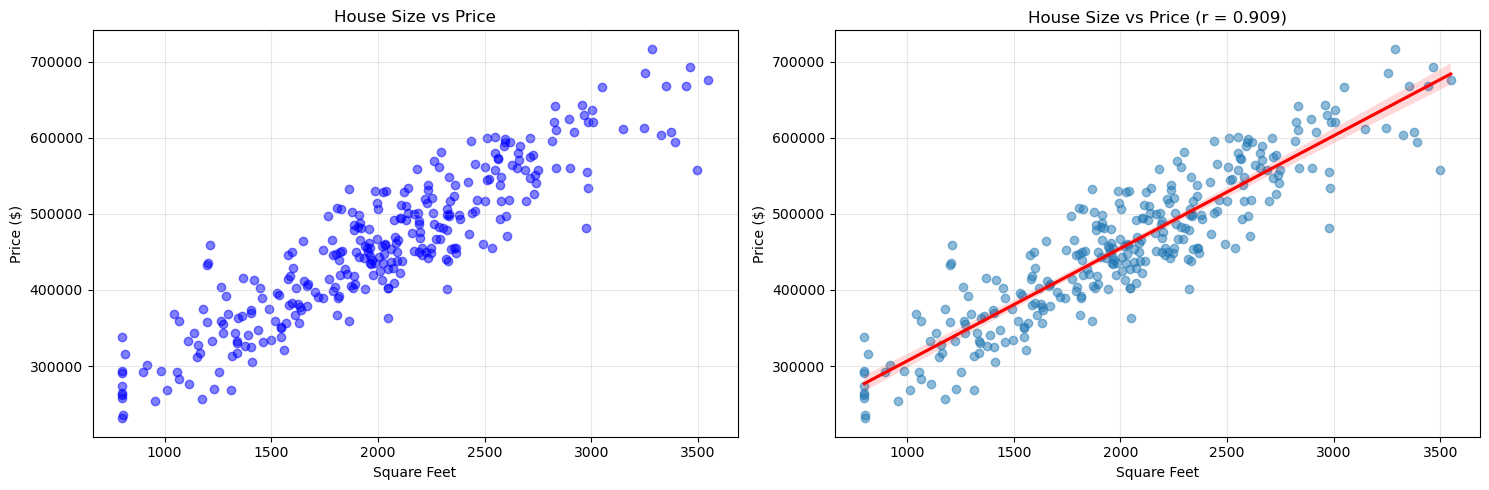

In [16]:
#Create scatter plot with regression line
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Basic scatter plot
axes[0].scatter(ex_3['sqft'], ex_3['price'], alpha=0.5, color='blue')
axes[0].set_xlabel('Square Feet')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('House Size vs Price')
axes[0].grid(True, alpha=0.3)

# Right plot: Scatter plot with regression line
sns.regplot(x='sqft', y='price', data=ex_3, ax=axes[1],
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_xlabel('Square Feet')
axes[1].set_ylabel('Price ($)')
axes[1].set_title(f'House Size vs Price (r = {correlation:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
#Calculate regression equation
slope, intercept, r_value, p_value, std_err = stats.linregress(ex_3['sqft'], ex_3['price'])

print("\n=== REGRESSION ANALYSIS ===")
print(f"Equation: Price = {intercept:,.2f} + {slope:.2f} × Square Feet")
print(f"R-squared: {r_value**2:.3f}")
print(f"For every 100 sqft increase, price increases by: ${slope * 100:,.2f}")


=== REGRESSION ANALYSIS ===
Equation: Price = 158,353.00 + 148.19 × Square Feet
R-squared: 0.826
For every 100 sqft increase, price increases by: $14,818.89


In [18]:
# Identify potential outliers
# Calculate residuals
predicted_price = intercept + slope * ex_3['sqft']
residuals = ex_3['price'] - predicted_price
std_residual = residuals.std()

# Flag houses with large residuals (> 2 standard deviations)
outliers = ex_3[abs(residuals) > 2 * std_residual]

print(f"\n=== OUTLIER DETECTION ===")
print(f"Number of potential outliers: {len(outliers)}")
if len(outliers) > 0:
    print("\nOutlier details:")
print(outliers[['house_id', 'sqft', 'price']])


=== OUTLIER DETECTION ===
Number of potential outliers: 10

Outlier details:
     house_id  sqft   price
53         54  2297  581211
65         66  1312  268175
93         94  1206  434989
131       132  1200  432266
179       180  2977  481665
202       203  2323  401518
231       232  3496  557516
234       235  2049  362847
255       256  1213  459659
289       290  1865  533354


In [19]:
print("\n=== INTERPRETATION ===")

# 1. Relationship direction
direction_text = "Positive" if slope > 0 else "Negative"
print(f"1. Relationship direction: {direction_text} — as square footage increases, price {'increases' if slope > 0 else 'decreases'}.")

# 2. Relationship linearity
print("2. Relationship linearity: The scatter plot and fitted regression line suggest a roughly linear relationship.")

# 3. Prediction quality
r_squared = r_value ** 2
if r_squared > 0.7:
    quality = "very strong"
elif r_squared > 0.4:
    quality = "moderate"
else:
    quality = "weak"

print(f"3. Prediction quality: R-squared = {r_squared:.3f}, indicating {quality} explanatory power of square footage on price.")

# 4. Price increase per 100 sqft
print(f"4. Price increase per 100 sqft: Approximately ${slope * 100:,.2f}.")

# 5. Investment advice (generic analytical framing)
if slope > 0 and r_squared > 0.5:
    advice = "Larger houses generally command higher prices; size appears to be an important value driver."
else:
    advice = "House size alone may not be a reliable predictor of price; other factors likely matter."

print(f"5. Investment advice: {advice}")


=== INTERPRETATION ===
1. Relationship direction: Positive — as square footage increases, price increases.
2. Relationship linearity: The scatter plot and fitted regression line suggest a roughly linear relationship.
3. Prediction quality: R-squared = 0.826, indicating very strong explanatory power of square footage on price.
4. Price increase per 100 sqft: Approximately $14,818.89.
5. Investment advice: Larger houses generally command higher prices; size appears to be an important value driver.


# MEDIUM LEVEL Exercise 4

In [20]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# TODO: Load the data
df = pd.read_csv("data/customer_transactions.csv")

# TODO: Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df['amount'].describe())

Dataset shape: (10000, 5)

First few rows:
   transaction_id  amount        date     category customer_type
0               1  160.86  2023-04-16         Home       Premium
1               2   28.74  2023-03-10         Home           New
2               3    2.60  2023-05-29     Clothing       Regular
3               4   15.97  2023-09-24        Books       Regular
4               5  157.02  2023-12-19  Electronics       Regular

Basic statistics:
count    10000.000000
mean        67.074469
std        119.367192
min          0.300000
25%         14.640000
50%         32.470000
75%         73.455000
max       3683.010000
Name: amount, dtype: float64


In [21]:
# TODO: Calculate skewness
original_skew = df['amount'].skew()
print(f"\n=== SKEWNESS ANALYSIS ===")
print(f"Original skewness: {original_skew:.3f}")
if abs(original_skew) > 1:
    print("⚠️ Data is heavily skewed - transformation recommended")
else:
    print("✅ Data is fairly symmetric - transformation may not be needed")


=== SKEWNESS ANALYSIS ===
Original skewness: 8.355
⚠️ Data is heavily skewed - transformation recommended


In [22]:
# TODO: Apply transformations
df['amount_log'] = np.log(df['amount'] + 1)
df['amount_sqrt'] = np.sqrt(df['amount'])

In [23]:
# Calculate skewness for transformations
log_skew = df['amount_log'].skew()
sqrt_skew = df['amount_sqrt'].skew()
print(f"\nLog transformation skewness: {log_skew:.3f}")
print(f"Square root transformation skewness: {sqrt_skew:.3f}")


Log transformation skewness: 0.156
Square root transformation skewness: 2.258



Best (closest-to-0 skewness): log


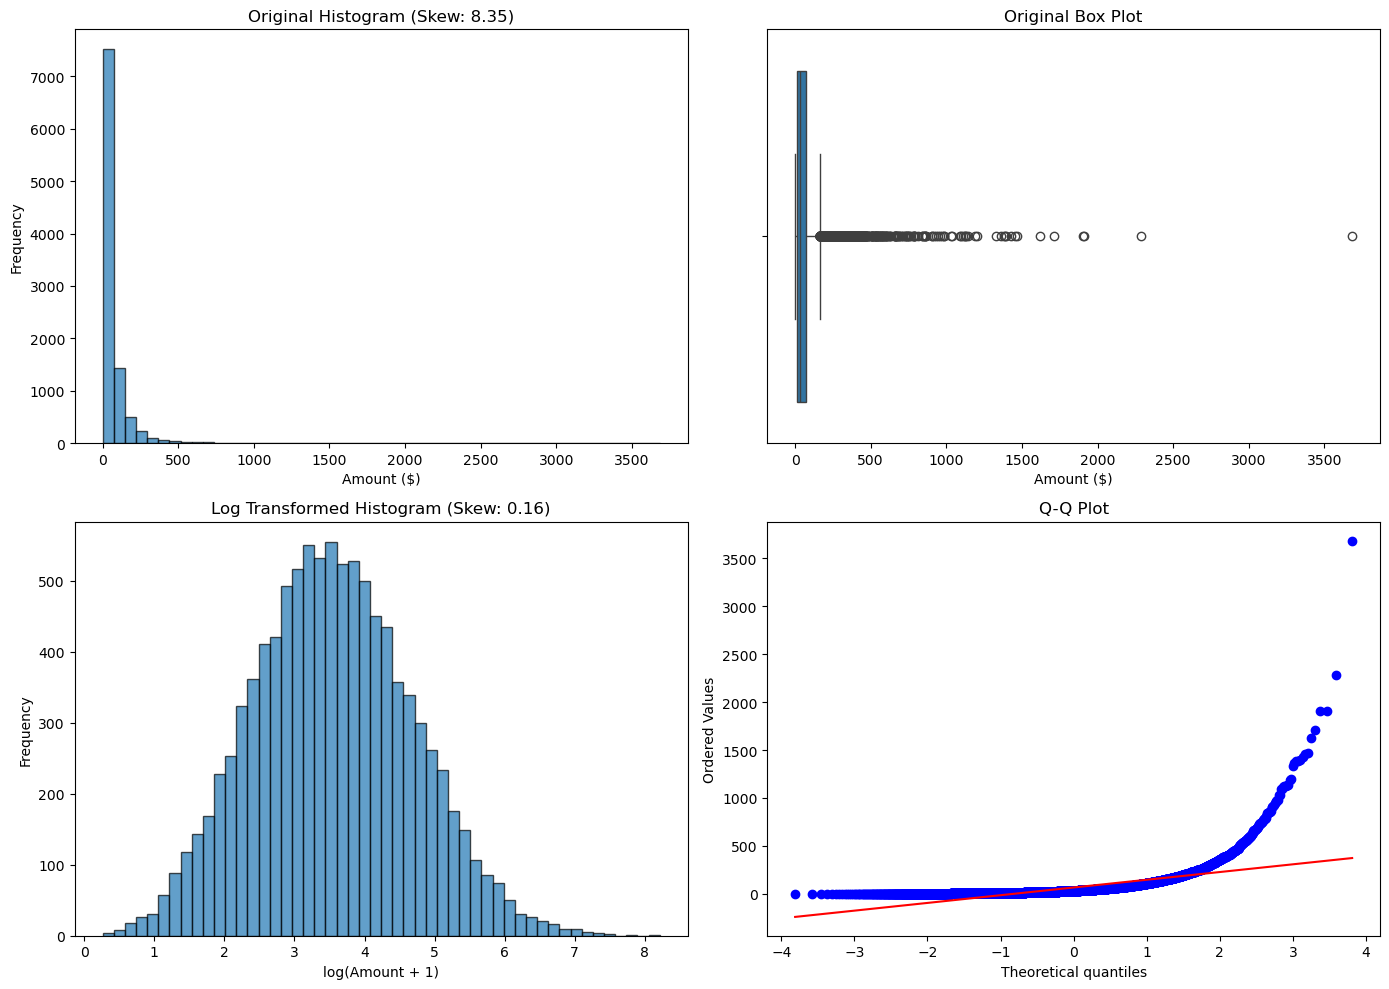

In [24]:
# Pick "best" transformation as skewness closest to 0
skew_candidates = {
    "original": abs(original_skew),
    "log": abs(log_skew),
    "sqrt": abs(sqrt_skew)
}
best_transform = min(skew_candidates, key=skew_candidates.get)
print(f"\nBest (closest-to-0 skewness): {best_transform}")

# TODO: Create 2x2 visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top Left: Original histogram
axes[0, 0].hist(df["amount"], bins=50, edgecolor="black", alpha=0.7)
axes[0, 0].set_title(f"Original Histogram (Skew: {original_skew:.2f})")
axes[0, 0].set_xlabel("Amount ($)")
axes[0, 0].set_ylabel("Frequency")

# Top Right: Original box plot
sns.boxplot(x=df["amount"], ax=axes[0, 1])
axes[0, 1].set_title("Original Box Plot")
axes[0, 1].set_xlabel("Amount ($)")

# Bottom Left: Log-transformed histogram
axes[1, 0].hist(df["amount_log"], bins=50, edgecolor="black", alpha=0.7)
axes[1, 0].set_title(f"Log Transformed Histogram (Skew: {log_skew:.2f})")
axes[1, 0].set_xlabel("log(Amount + 1)")
axes[1, 0].set_ylabel("Frequency")

# Bottom Right: Q-Q plot
stats.probplot(df["amount"].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot")

plt.tight_layout()
plt.show()

In [25]:
# TODO: Outlier detection using IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"\n=== OUTLIER ANALYSIS ===")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Outlier bounds: ${lower_bound:.2f} - ${upper_bound:.2f}")
if len(outliers) > 0:
    print("\nOutlier distribution by category:")
    print(outliers['category'].value_counts())
    print("\nOutlier distribution by customer type:")
    print(outliers['customer_type'].value_counts())


=== OUTLIER ANALYSIS ===
Number of outliers: 907 (9.07%)
Outlier bounds: $-73.58 - $161.68

Outlier distribution by category:
category
Clothing       247
Electronics    231
Home           231
Books          198
Name: count, dtype: int64

Outlier distribution by customer type:
customer_type
Regular    436
New        280
Premium    191
Name: count, dtype: int64


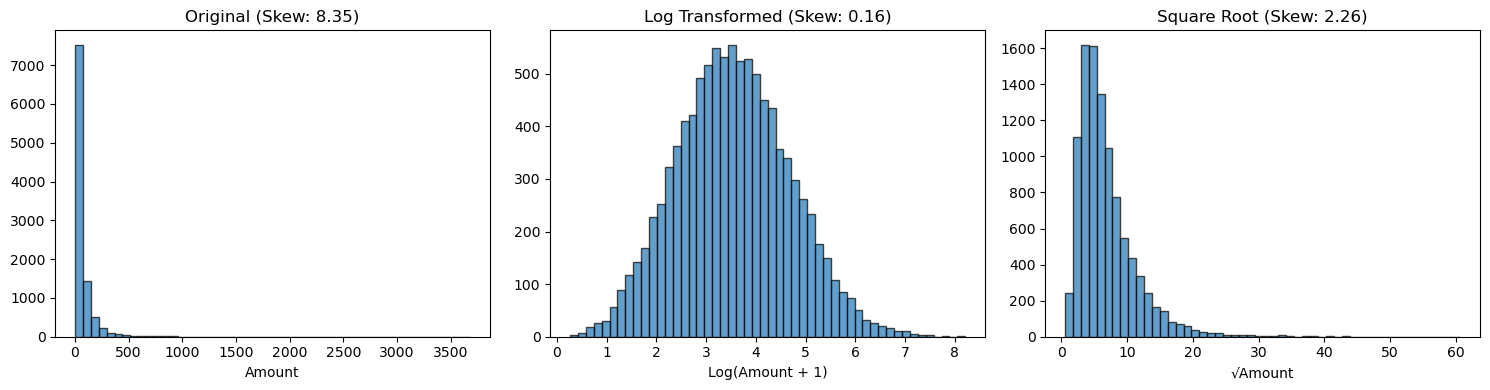

In [26]:
# TODO: Compare transformations side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df['amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Original (Skew: {original_skew:.2f})')
axes[0].set_xlabel('Amount')
axes[1].hist(df['amount_log'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title(f'Log Transformed (Skew: {log_skew:.2f})')
axes[1].set_xlabel('Log(Amount + 1)')
axes[2].hist(df['amount_sqrt'], bins=50, edgecolor='black', alpha=0.7)
axes[2].set_title(f'Square Root (Skew: {sqrt_skew:.2f})')
axes[2].set_xlabel('√Amount')
plt.tight_layout()
plt.show()

In [27]:
# TODO: Answer questions
print("\n=== RECOMMENDATIONS ===")
print("1. Best transformation: Log transformed")
print("2. Outlier handling: Keep outliers but apply log transformation; large transactions may be meaningful business values")
print("3. Impact on analysis:  Improves normality, stabilizes variance, and leads to more reliable statistical modeling results")


=== RECOMMENDATIONS ===
1. Best transformation: Log transformed
2. Outlier handling: Keep outliers but apply log transformation; large transactions may be meaningful business values
3. Impact on analysis:  Improves normality, stabilizes variance, and leads to more reliable statistical modeling results


# MEDIUM LEVEL EXERCISE 6

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data with date parsing
df = pd.read_csv("data/daily_sales.csv', parse_dates=['date'])

# Set date as index and sort
df = df.set_index('date')
df = df.sort_index()

# Initial exploration
print("Dataset shape:", df.shape)
print("\nDate range:", df.index.min(), "to", df.index.max())
print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df['daily_sales'].describe())

Dataset shape: (730, 3)

Date range: 2022-01-01 00:00:00 to 2023-12-31 00:00:00

First few rows:
            daily_sales day_of_week  is_holiday
date                                           
2022-01-01     59305.83    Saturday       False
2022-01-02     40211.50      Sunday       False
2022-01-03     45509.78      Monday       False
2022-01-04     49056.16     Tuesday       False
2022-01-05     51716.04   Wednesday       False

Basic statistics:
count       730.000000
mean      56784.823521
std        8792.188593
min       38757.410000
25%       50404.505000
50%       55272.125000
75%       61901.505000
max      100000.000000
Name: daily_sales, dtype: float64


In [30]:
# Check for missing dates
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = date_range.difference(df.index)
print(f"\nMissing dates: {len(missing_dates)}")


Missing dates: 0


In [31]:
# Check duplicates
print("\nDuplicate dates:", df.index.duplicated().sum())


Duplicate dates: 0


In [33]:
# TODO: Calculate rolling averages
df['rolling_7'] = df['daily_sales'].rolling(window=7).mean()
df['rolling_30'] = df['daily_sales'].rolling(window=30).mean()

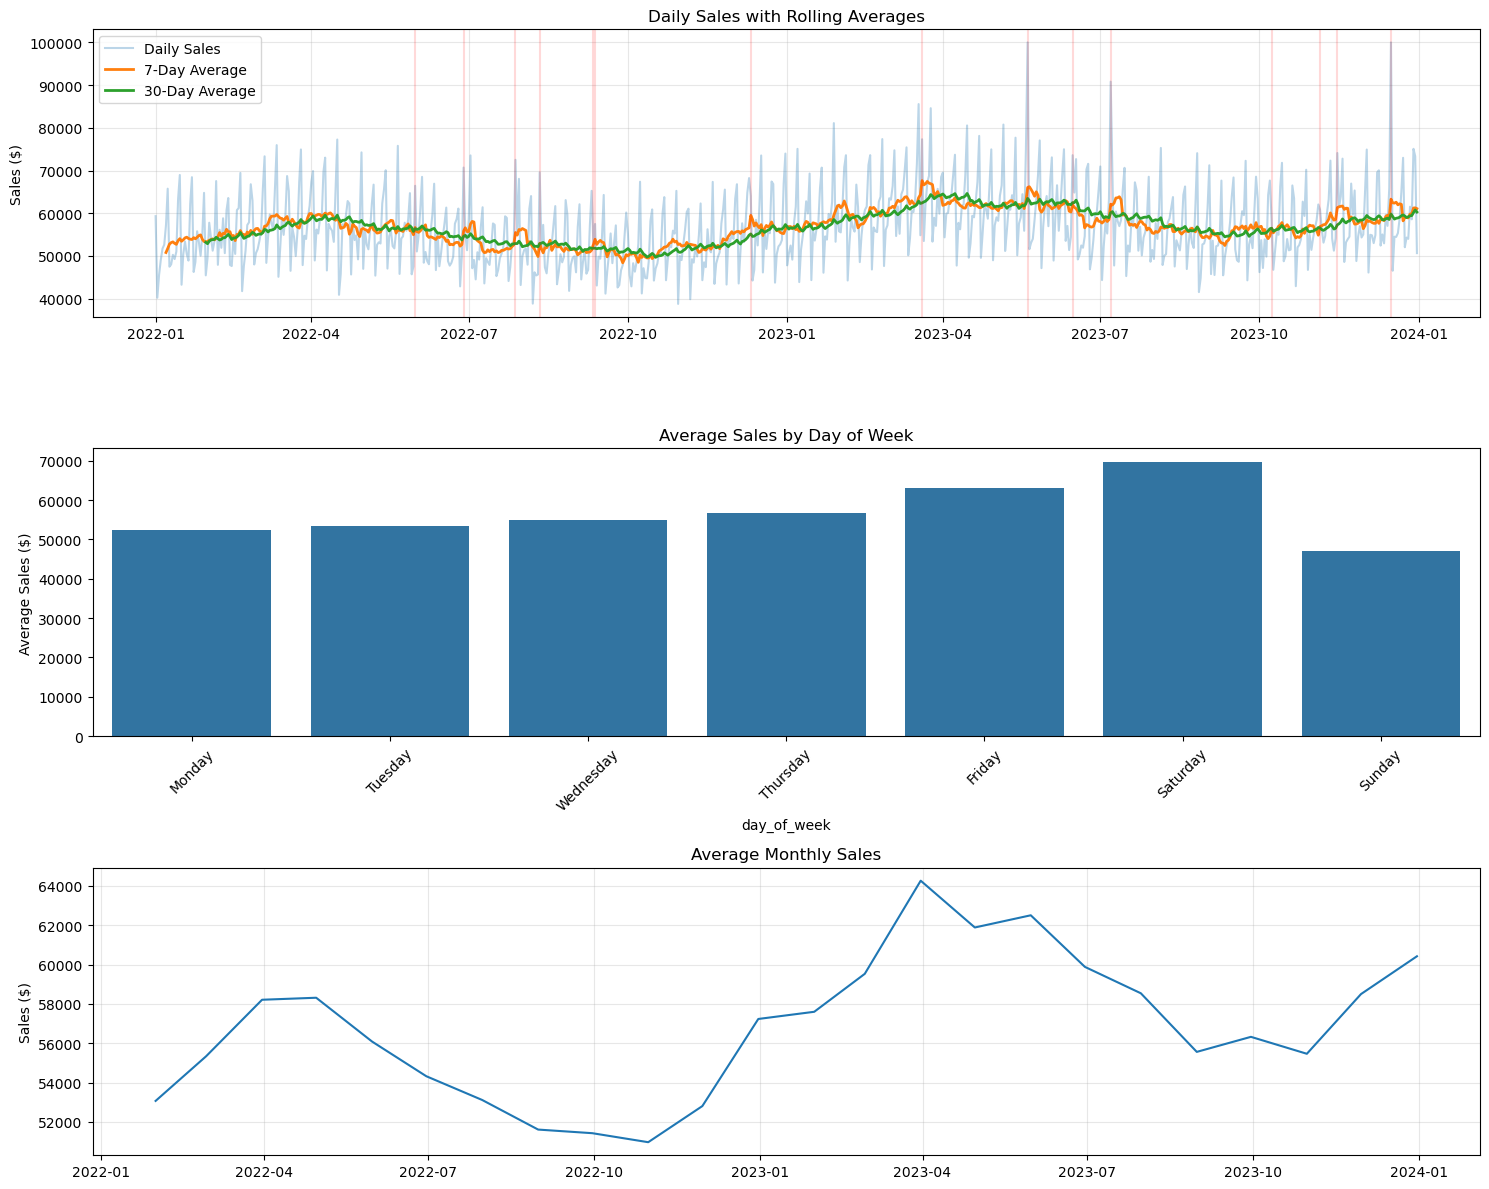

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# =========================
# Plot 1: Raw + Rolling Avg
# =========================
axes[0].plot(df.index, df['daily_sales'], alpha=0.3, label='Daily Sales')
axes[0].plot(df.index, df['rolling_7'], linewidth=2, label='7-Day Average')
axes[0].plot(df.index, df['rolling_30'], linewidth=2, label='30-Day Average')

# Mark holidays
holiday_dates = df[df['is_holiday'] == True].index
for hdate in holiday_dates:
    axes[0].axvline(hdate, color='red', alpha=0.15)

axes[0].set_title('Daily Sales with Rolling Averages')
axes[0].set_ylabel('Sales ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Day of Week Pattern
# =========================
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday', 'Sunday']

day_avg = df.groupby('day_of_week')['daily_sales'].mean().reindex(day_order)

sns.barplot(x=day_avg.index, y=day_avg.values, ax=axes[1])
axes[1].set_title('Average Sales by Day of Week')
axes[1].set_ylabel('Average Sales ($)')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Monthly Trend
# =========================
monthly_avg = df['daily_sales'].resample('ME').mean()
axes[2].plot(monthly_avg.index, monthly_avg.values)
axes[2].set_title('Average Monthly Sales')
axes[2].set_ylabel('Sales ($)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
mean_sales = df['daily_sales'].mean()
std_sales = df['daily_sales'].std()

upper_threshold = mean_sales + 2 * std_sales
lower_threshold = mean_sales - 2 * std_sales

anomalies = df[
    (df['daily_sales'] > upper_threshold) |
    (df['daily_sales'] < lower_threshold)
]

print("\n=== ANOMALY DETECTION ===")
print(f"Mean sales: ${mean_sales:,.2f}")
print(f"Std dev: ${std_sales:,.2f}")
print(f"Upper threshold: ${upper_threshold:,.2f}")
print(f"Lower threshold: ${lower_threshold:,.2f}")
print(f"\nNumber of anomalies: {len(anomalies)} ({len(anomalies)/len(df)*100:.1f}%)")

if len(anomalies) > 0:
    print("\nTop 5 highest sales days:")
    print(df.nlargest(5, 'daily_sales')[['daily_sales', 'day_of_week', 'is_holiday']])
    
    print("\nTop 5 lowest sales days:")
    print(df.nsmallest(5, 'daily_sales')[['daily_sales', 'day_of_week', 'is_holiday']])


=== ANOMALY DETECTION ===
Mean sales: $56,784.82
Std dev: $8,792.19
Upper threshold: $74,369.20
Lower threshold: $39,200.45

Number of anomalies: 28 (3.8%)

Top 5 highest sales days:
            daily_sales day_of_week  is_holiday
date                                           
2023-05-20    100000.00    Saturday        True
2023-12-16    100000.00    Saturday        True
2023-07-07     90801.57      Friday        True
2023-03-18     85556.30    Saturday       False
2023-03-25     84592.90    Saturday       False

Top 5 lowest sales days:
            daily_sales day_of_week  is_holiday
date                                           
2022-10-30     38757.41      Sunday       False
2022-08-07     38829.05      Sunday       False
2022-11-06     39855.05      Sunday       False
2022-01-02     40211.50      Sunday       False
2022-04-17     40887.08      Sunday       False


In [36]:
print("\n=== SEASONALITY ANALYSIS ===")

print("\nAverage sales by day of week:")
print(day_avg)

print("\nMonthly averages:")
print(monthly_avg)


=== SEASONALITY ANALYSIS ===

Average sales by day of week:
day_of_week
Monday       52392.898558
Tuesday      53469.850577
Wednesday    54969.648750
Thursday     56765.170481
Friday       63098.053846
Saturday     69630.736286
Sunday       47136.658571
Name: daily_sales, dtype: float64

Monthly averages:
date
2022-01-31    53067.180000
2022-02-28    55337.001429
2022-03-31    58208.830968
2022-04-30    58311.258000
2022-05-31    56081.976452
2022-06-30    54322.904667
2022-07-31    53114.219355
2022-08-31    51610.607419
2022-09-30    51427.001667
2022-10-31    50968.828710
2022-11-30    52805.152333
2022-12-31    57232.202258
2023-01-31    57597.404516
2023-02-28    59526.104643
2023-03-31    64260.148065
2023-04-30    61882.076000
2023-05-31    62502.160645
2023-06-30    59879.561667
2023-07-31    58538.016774
2023-08-31    55559.363548
2023-09-30    56323.851000
2023-10-31    55462.934516
2023-11-30    58496.890000
2023-12-31    60418.492581
Freq: ME, Name: daily_sales, dtype: flo

In [37]:
# TODO: Answer questions
print("\n=== INSIGHTS & RECOMMENDATIONS ===")
print("1. Overall trend: Moderate upward growth; 2023 performance consistently outpaced 2022.")
print("2. Best day of week: Saturday ($69,630 average), while Sunday is the weakest ($47,136).")
print("3. Seasonal patterns: Bi-annual peaks in Spring (March/April) and Winter (December).")
print("4. Anomalies to investigate: 100k cap on 2023-05-20/2023-12-16 and extreme Sunday lows.")


=== INSIGHTS & RECOMMENDATIONS ===
1. Overall trend: Moderate upward growth; 2023 performance consistently outpaced 2022.
2. Best day of week: Saturday ($69,630 average), while Sunday is the weakest ($47,136).
3. Seasonal patterns: Bi-annual peaks in Spring (March/April) and Winter (December).
4. Anomalies to investigate: 100k cap on 2023-05-20/2023-12-16 and extreme Sunday lows.


What’s the overall trend? (Growing, declining, stable?)

The overall trend is growing. Sales in 2023 consistently exceed those in 2022, and the 30-day rolling average shows a steady upward shift in the business baseline from approximately 
58,000. This indicates sustained year-over-year growth rather than short-term fluctuations or instability.

What day of week is strongest? Weakest?

Saturday is the strongest-performing day, averaging approximately USD 69,630 in sales, followed by Friday. Sunday is the weakest day by a wide margin, averaging about $ 47,136. The data shows a consistent build-up from Monday through Saturday before a sharp decline on Sunday.

What seasonal patterns exist?

Sales exhibit clear seasonal cycles, with strong peaks occurring in March/April and again in December. Noticeable dips appear during late summer (August/September) and mid-winter (January/February). These recurring fluctuations suggest structured seasonality likely driven by holidays, promotions, and consumer spending behavior.

Should any anomalies be investigated further?

Yes. While most high anomalies align with holidays and peak weekends, two days reached exactly $100,000, which may indicate a system cap or reporting ceiling. Additionally, consistently low Sunday sales warrant review to determine whether operational factors or reduced hours impact revenue performance.

# Hard Excercise 7: Missing Data Investigation & Strategy

In [38]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import ks_2samp

# Load the data
ex_7 = pd.read_csv("data//customer_survey.csv')
print("Dataset shape:", ex_7.shape)
print("\nFirst few rows:")
print(ex_7.head())

# Calculate missing data statistics
print("\n=== MISSING DATA SUMMARY ===")
missing_counts = ex_7.isnull().sum()
missing_pct = (missing_counts / len(ex_7)) * 100

missing_df = pd.DataFrame({
    'Variable': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Pct': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Pct', ascending=False)
print(missing_df)

total_missing = ex_7.isnull().sum().sum()
total_possible = ex_7.shape[0] * ex_7.shape[1]
print(f"\nTotal missing data points: {total_missing} ({total_missing/total_possible*100:.2f}%)")

Dataset shape: (5000, 24)

First few rows:
   respondent_id   age   income    education  q1  q2  q3  q4   q5  q6  ...  \
0              1  18.0      NaN  High School   3   4   3   3  4.0   3  ...   
1              2  55.0  34276.0          PhD   4   3   3   3  3.0   3  ...   
2              3  51.0  20000.0       Master   3   2   3   3  2.0   4  ...   
3              4  48.0      NaN     Bachelor   4   2   2   3  2.0   4  ...   
4              5  35.0      NaN     Bachelor   3   4   4   1  3.0   2  ...   

   q11  q12  q13  q14  q15  q16  q17  q18  q19  q20  
0    2    3    2    2  5.0  3.0  1.0  4.0    5    3  
1    3    3    2    2  4.0  NaN  4.0  NaN    4    3  
2    3    2    2    2  NaN  NaN  3.0  NaN    4    4  
3    1    4    4    5  3.0  3.0  4.0  4.0    2    4  
4    4    3    3    3  4.0  3.0  4.0  3.0    5    3  

[5 rows x 24 columns]

=== MISSING DATA SUMMARY ===
   Variable  Missing_Count  Missing_Pct
2    income           3497        69.94
19      q16           1410     

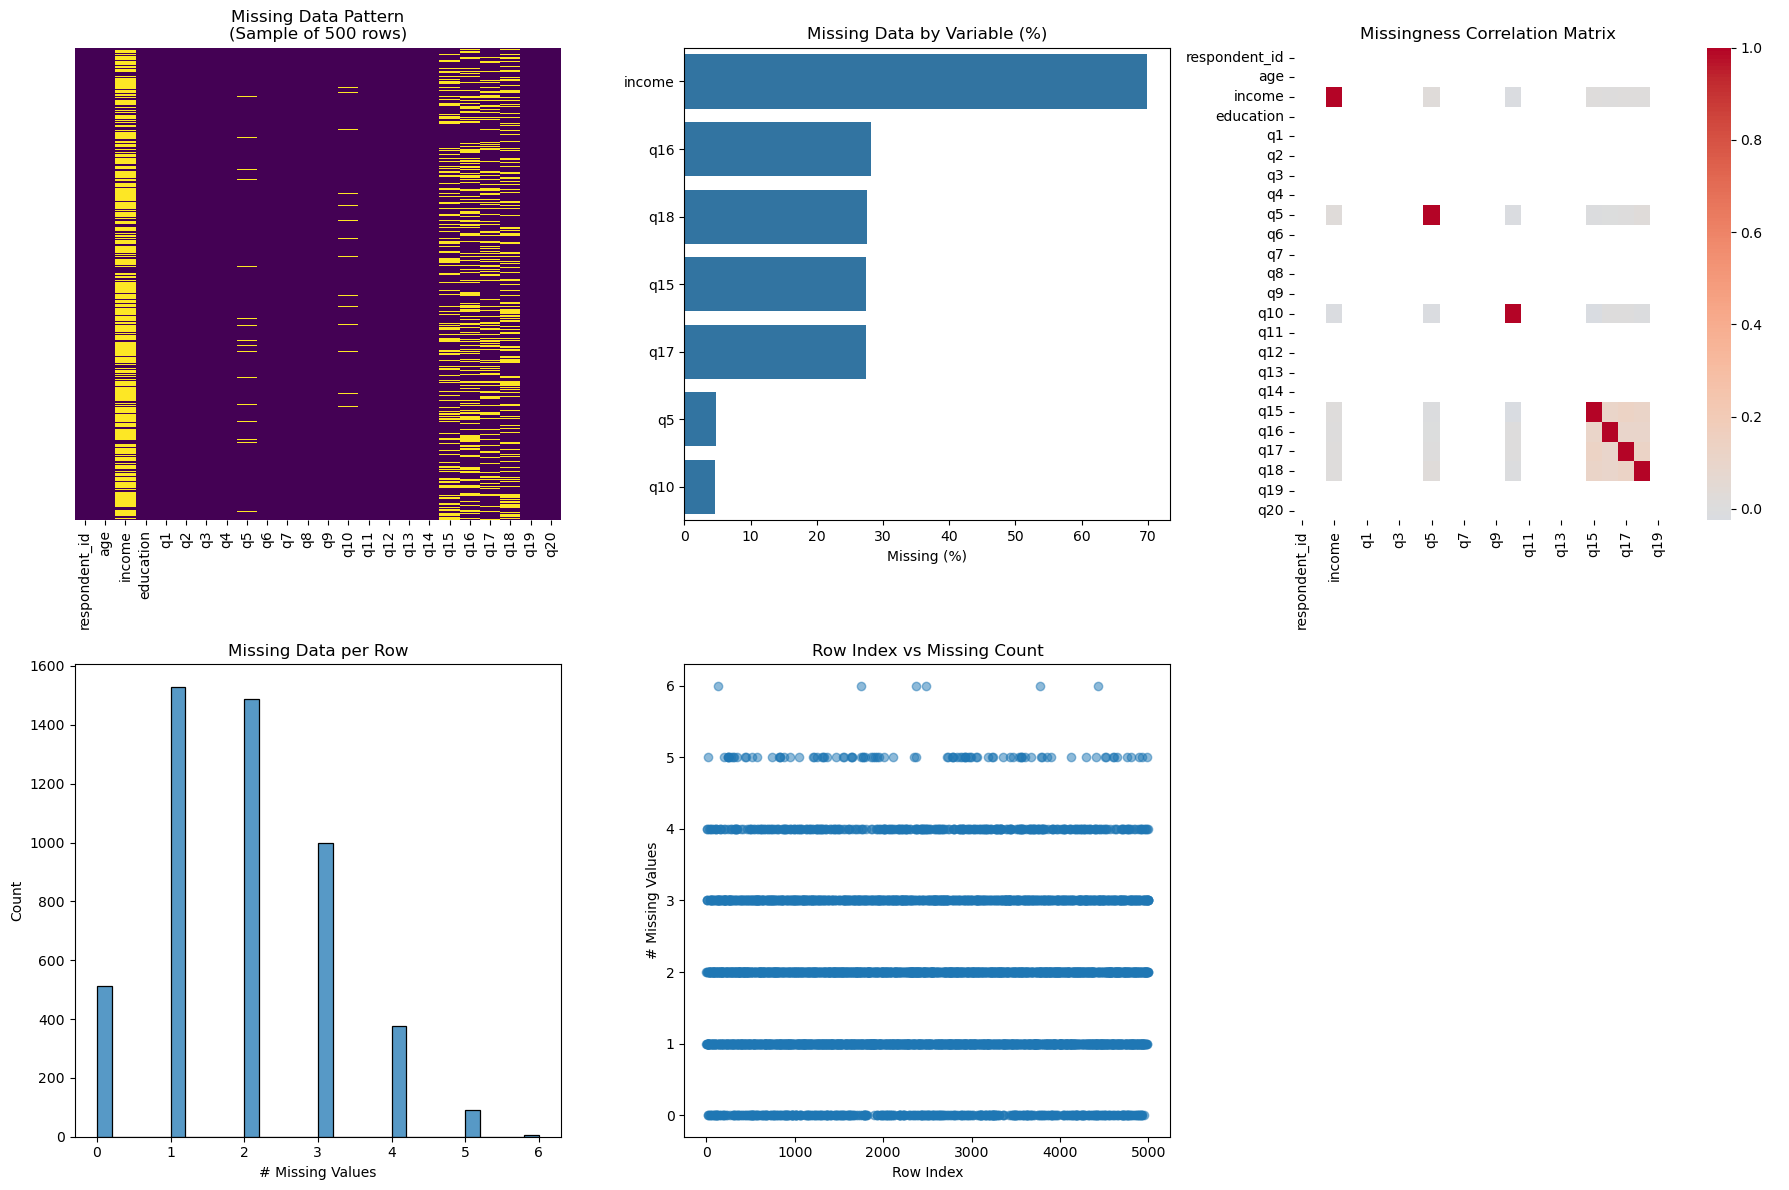

In [39]:
# Create missing data visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Missing data heatmap (sample of rows)
sample_indices = np.random.choice(ex_7.index, size=min(500, len(ex_7)), replace=False)
sns.heatmap(ex_7.loc[sample_indices].isnull(), cbar=False, yticklabels=False,
            cmap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Missing Data Pattern\n(Sample of 500 rows)')

# Plot 2: Missing percentages by variable
sns.barplot(data=missing_df, x='Missing_Pct', y='Variable', ax=axes[0, 1])
axes[0, 1].set_title('Missing Data by Variable (%)')
axes[0, 1].set_xlabel('Missing (%)')
axes[0, 1].set_ylabel('')

# Plot 3: Missingness correlation matrix
missing_ind = ex_7.isnull().astype(int)
miss_corr = missing_ind.corr(numeric_only=True)
sns.heatmap(miss_corr, cmap='coolwarm', center=0, ax=axes[0, 2])
axes[0, 2].set_title('Missingness Correlation Matrix')

# Plot 4: Missing data by row
row_missing = ex_7.isnull().sum(axis=1)
sns.histplot(row_missing, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Missing Data per Row')
axes[1, 0].set_xlabel('# Missing Values')
axes[1, 0].set_ylabel('Count')

# Plot 5: Row index vs missing count
axes[1, 1].scatter(ex_7.index, row_missing, alpha=0.5)
axes[1, 1].set_title('Row Index vs Missing Count')
axes[1, 1].set_xlabel('Row Index')
axes[1, 1].set_ylabel('# Missing Values')

# Plot 6: leave blank (keeps 2x3 grid)
axes[1, 2].axis('off')
axes[1, 2].set_title('')

plt.tight_layout()
plt.show()

In [40]:
# Create "was_missing" indicator variables for modeling
print("\n=== CREATING MISSINGNESS INDICATORS ===")
missing_cols = missing_df['Variable'].tolist()
for col in missing_cols:
    ex_7[f'{col}_was_missing'] = ex_7[col].isnull().astype(int)
print(f"Created {len(missing_cols)} missingness indicator variables.")



=== CREATING MISSINGNESS INDICATORS ===
Created 7 missingness indicator variables.



=== TESTING FOR MAR: Does Age Correlate with Income Missingness? ===


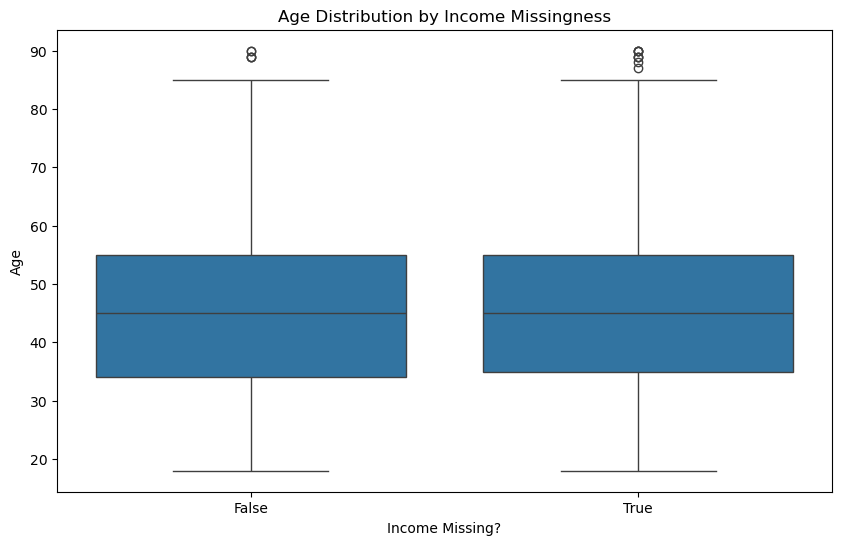

T-test results: t-stat = 0.192, p-value = 0.84738


In [41]:
# Test missingness type - MAR analysis (Age vs Income missingness)
print("\n=== TESTING FOR MAR: Does Age Correlate with Income Missingness? ===")
df_temp = ex_7.copy()
df_temp['income_missing'] = ex_7['income'].isnull()

# Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_missing', y='age', data=df_temp)
plt.title('Age Distribution by Income Missingness')
plt.xlabel('Income Missing?')
plt.ylabel('Age')
plt.show()

# Statistical test
t_stat_age, p_value_age = stats.ttest_ind(
    df_temp[df_temp['income_missing']]['age'].dropna(),
    df_temp[~df_temp['income_missing']]['age'].dropna(),
    equal_var=False
)
print(f"T-test results: t-stat = {t_stat_age:.3f}, p-value = {p_value_age:.5f}")



=== TESTING FOR MAR: Does Education Correlate with Income Missingness? ===


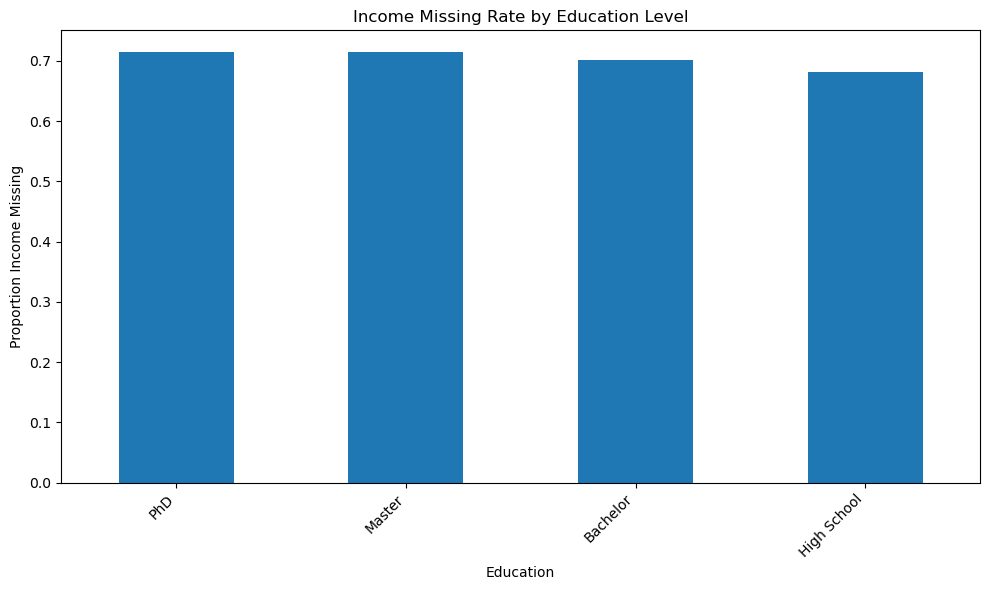

Chi-square results: chi2 = 4.121, dof = 3, p-value = 0.24866


In [42]:
# Test missingness type - MAR analysis (Education vs Income missingness)
print("\n=== TESTING FOR MAR: Does Education Correlate with Income Missingness? ===")

if 'education' in ex_7.columns:
    df_temp2 = ex_7.copy()
    df_temp2['income_missing'] = ex_7['income'].isnull()

    # Bar plot: income missing rate by education category
    edu_missing_rate = df_temp2.groupby('education')['income_missing'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    edu_missing_rate.plot(kind='bar')
    plt.title('Income Missing Rate by Education Level')
    plt.xlabel('Education')
    plt.ylabel('Proportion Income Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Chi-square test: education vs income_missing
    contingency = pd.crosstab(df_temp2['education'], df_temp2['income_missing'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square results: chi2 = {chi2:.3f}, dof = {dof}, p-value = {p_value:.5f}")

else:
    print("Education variable not found in dataset.")


In [43]:
# Prepare data for imputation 
numeric_cols = ex_7.select_dtypes(include=[np.number]).columns.tolist()
if 'respondent_id' in numeric_cols:
    numeric_cols.remove('respondent_id')

# Remove indicator variables from imputation set 
numeric_cols = [c for c in numeric_cols if not c.endswith('_was_missing')]

df_numeric = ex_7[numeric_cols].copy()

print(f"\n=== IMPUTATION ANALYSIS ===")
print(f"Numeric columns to impute: {len(numeric_cols)}")



=== IMPUTATION ANALYSIS ===
Numeric columns to impute: 22


In [44]:
#  Method 1 - Simple mean imputation
simple_imputer = SimpleImputer(strategy='mean')
df_simple = pd.DataFrame(simple_imputer.fit_transform(df_numeric),
                         columns=df_numeric.columns,
                         index=df_numeric.index)

#  Method 2 - KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_numeric),
                      columns=df_numeric.columns,
                      index=df_numeric.index)

# Method 3 - Iterative imputation
iter_imputer = IterativeImputer(random_state=42, max_iter=10)
df_iter = pd.DataFrame(iter_imputer.fit_transform(df_numeric),
                       columns=df_numeric.columns,
                       index=df_numeric.index)

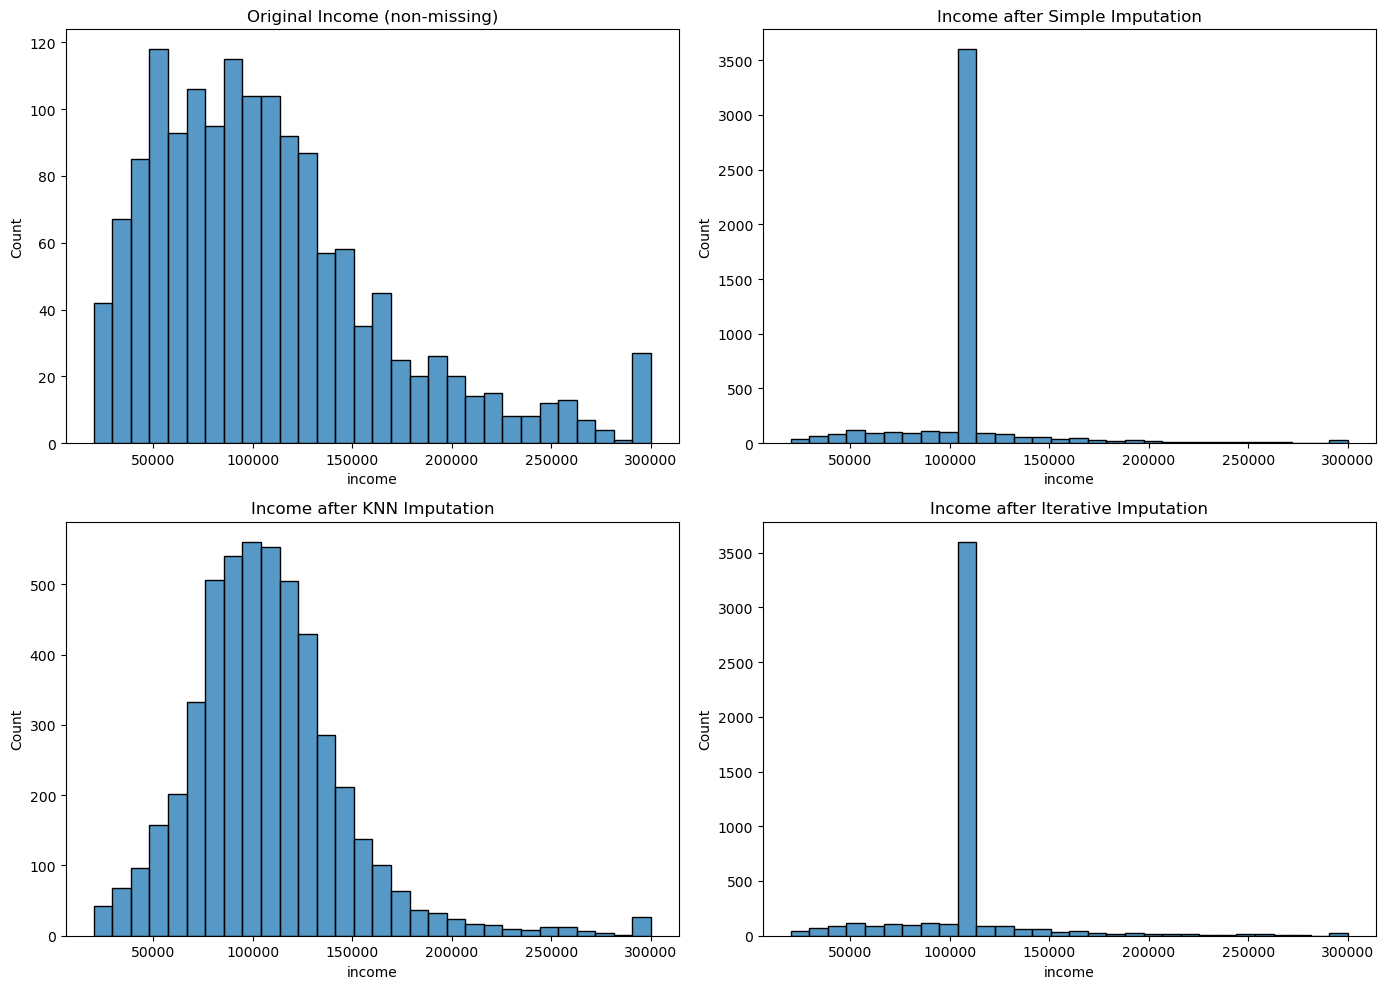

In [45]:
# Compare distributions for a key variable (e.g., income)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original distribution
sns.histplot(df_numeric['income'].dropna(), bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Original Income (non-missing)')

# Simple imputation
sns.histplot(df_simple['income'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Income after Simple Imputation')

# KNN imputation
sns.histplot(df_knn['income'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Income after KNN Imputation')

# Iterative imputation
sns.histplot(df_iter['income'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Income after Iterative Imputation')

plt.tight_layout()
plt.show()

In [46]:
# Compare correlation preservation
print("\n=== CORRELATION PRESERVATION CHECK ===")
# Original correlations (pairwise complete)
original_corr = df_numeric.corr()

# Imputed correlations
simple_corr = df_simple.corr()
knn_corr = df_knn.corr()
iter_corr = df_iter.corr()

# Calculate difference from original
print("Mean absolute difference from original correlations:")
print(f"Simple Imputation: {np.abs(simple_corr - original_corr).mean().mean():.4f}")
print(f"KNN Imputation: {np.abs(knn_corr - original_corr).mean().mean():.4f}")
print(f"Iterative Imputation: {np.abs(iter_corr - original_corr).mean().mean():.4f}")


=== CORRELATION PRESERVATION CHECK ===
Mean absolute difference from original correlations:
Simple Imputation: 0.0016
KNN Imputation: 0.0025
Iterative Imputation: 0.0015


In [47]:
# Statistical comparison of distributions
print("\n=== DISTRIBUTION COMPARISON (Kolmogorov-Smirnov Test) ===")
test_col = 'income'
if test_col in df_numeric.columns:
    original_data = df_numeric[test_col].dropna()
    ks_simple = ks_2samp(original_data, df_simple[test_col])
    ks_knn = ks_2samp(original_data, df_knn[test_col])
    ks_iter = ks_2samp(original_data, df_iter[test_col])

    print(f"Simple vs Original: KS statistic = {ks_simple.statistic:.4f}, p-value = {ks_simple.pvalue:.5f}")
    print(f"KNN vs Original: KS statistic = {ks_knn.statistic:.4f}, p-value = {ks_knn.pvalue:.5f}")
    print(f"Iterative vs Original: KS statistic = {ks_iter.statistic:.4f}, p-value = {ks_iter.pvalue:.5f}")

print("\nLower KS statistic = better preservation of original distribution")


=== DISTRIBUTION COMPARISON (Kolmogorov-Smirnov Test) ===
Simple vs Original: KS statistic = 0.4053, p-value = 0.00000
KNN vs Original: KS statistic = 0.1652, p-value = 0.00000
Iterative vs Original: KS statistic = 0.4053, p-value = 0.00000

Lower KS statistic = better preservation of original distribution


In [48]:
# Final recommendations
print("\n=== RECOMMENDATIONS ===")

# 1) Missingness type diagnosis (based on p-values you already printed)
mar_age = (p_value_age < 0.05) if 'p_value_age' in globals() and pd.notna(p_value_age) else False
mar_edu = (p_value < 0.05) if 'p_value' in globals() and pd.notna(p_value) else False  # from chi-square block

if mar_age or mar_edu:
    print("1. Missingness type diagnosis: Likely MAR (missingness relates to observed variables like age/education).")
else:
    print("1. Missingness type diagnosis: MCAR is plausible (no strong evidence missingness relates to age/education).")

# 2) Recommended imputation method (based on correlation preservation + KS)
diff_simple = np.abs(simple_corr - original_corr).mean().mean()
diff_knn = np.abs(knn_corr - original_corr).mean().mean()
diff_iter = np.abs(iter_corr - original_corr).mean().mean()

methods = {
    "Simple (Mean)": (diff_simple, ks_simple.statistic),
    "KNN": (diff_knn, ks_knn.statistic),
    "Iterative": (diff_iter, ks_iter.statistic)
}

best_method = min(methods, key=lambda m: (methods[m][0], methods[m][1]))

print(f"2. Recommended imputation method: {best_method}")

# 3) Justification (show the numbers you used)
print("3. Justification:")
print(f"   - Correlation change (lower is better): Simple={diff_simple:.4f}, KNN={diff_knn:.4f}, Iterative={diff_iter:.4f}")
print(f"   - Distribution change for income (lower KS is better): Simple={ks_simple.statistic:.4f}, KNN={ks_knn.statistic:.4f}, Iterative={ks_iter.statistic:.4f}")

# 4) Risks and limitations
print("4. Risks and limitations: If MNAR, imputations can be biased; Mean can distort variance; KNN depends on local similarity; Iterative is more computationally expensive.")

# 5) Variables to potentially drop (highest missing %)
print("5. Variables to potentially drop: Consider variables with the highest missing percentages (top of missing_df).")




=== RECOMMENDATIONS ===
1. Missingness type diagnosis: MCAR is plausible (no strong evidence missingness relates to age/education).
2. Recommended imputation method: Iterative
3. Justification:
   - Correlation change (lower is better): Simple=0.0016, KNN=0.0025, Iterative=0.0015
   - Distribution change for income (lower KS is better): Simple=0.4053, KNN=0.1652, Iterative=0.4053
4. Risks and limitations: If MNAR, imputations can be biased; Mean can distort variance; KNN depends on local similarity; Iterative is more computationally expensive.
5. Variables to potentially drop: Consider variables with the highest missing percentages (top of missing_df).
